In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import gc; gc.enable()

# Malignant vs Benign

## Binary Classification Example

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head().append(df.tail())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


# Linear Models for (Binary) Classification Problems?

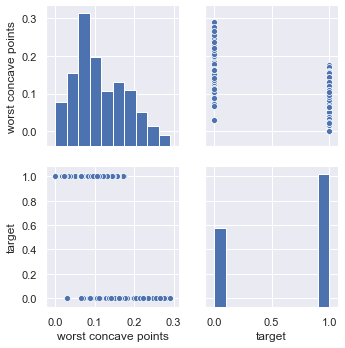

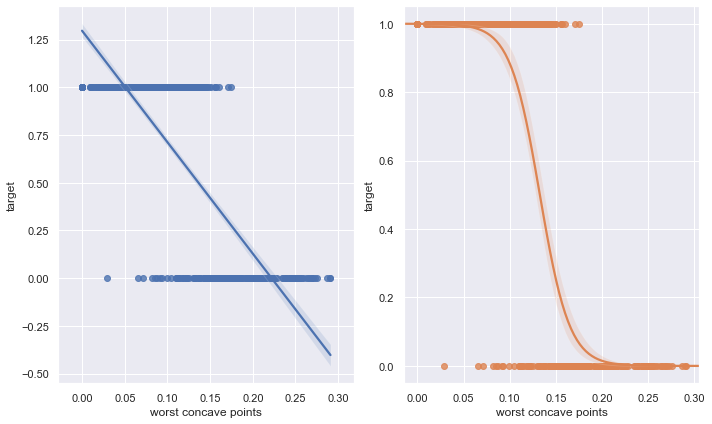

In [4]:
sns.pairplot(df[['worst concave points', 'target']])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.regplot(df['worst concave points'], df['target'], truncate=True, ax=axes[0])
sns.regplot(df['worst concave points'], df['target'], logistic=True, ax=axes[1])
plt.tight_layout()
plt.show()

## Class Imbalance

In [5]:
y = df.target
X = df.drop('target', axis=1)

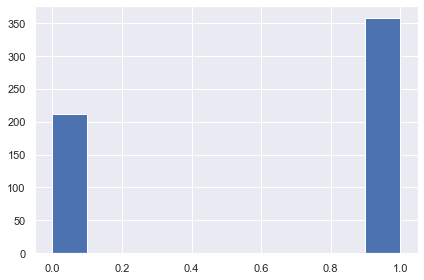

In [6]:
y.hist()
plt.tight_layout()
plt.show()

## Simple LogReg Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
scaler = MinMaxScaler()
lr = LogisticRegression(class_weight='balanced', penalty='l1', C=0.2, solver='liblinear')
pipe = make_pipeline(scaler, lr)

pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

## Metrics

In [9]:
print("TRAIN:")
print(confusion_matrix(y_train, train_preds))
print('')
print("TEST:")
print(confusion_matrix(y_test, test_preds))

TRAIN:
[[143  11]
 [ 13 231]]

TEST:
[[ 55   3]
 [ 11 102]]


In [10]:
print("Accuracy:"); print("="*len("Accuracy:"))
print("TRAIN:", accuracy_score(y_train, train_preds))
print("TEST:", accuracy_score(y_test, test_preds))

Accuracy:
TRAIN: 0.9396984924623115
TEST: 0.9064327485380117


In [11]:
print("Balanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print("TRAIN:", balanced_accuracy_score(y_train, train_preds))
print("TEST:", balanced_accuracy_score(y_test, test_preds))

Balanced Accuracy:
TRAIN: 0.9374449823943662
TEST: 0.9054455445544555


In [12]:
train_preds = pipe.predict_proba(X_train)[:,1]
test_preds = pipe.predict_proba(X_test)[:,1]

print("AUC:"); print("="*len("AUC:"))
print("TRAIN:", roc_auc_score(y_train, train_preds))
print("TEST:", roc_auc_score(y_test, test_preds))

AUC:
====
TRAIN: 0.9870983714788732
TEST: 0.9708628005657709


In [13]:
coeffs = pipe['logisticregression'].coef_
coeffs

array([[ 0.        , -0.01563266,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -3.81841276, -0.01118526,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -6.34665347,  0.        ,  0.        ]])

In [14]:
key = [np.abs(coeffs) > 0]
pd.DataFrame(X.columns).iloc[key[0][0]]

,0
1,mean texture
20,worst radius
21,worst texture
27,worst concave points


In [15]:
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.983787479398354 +/- 0.009343056031298801


# References
 
 * https://online.stat.psu.edu/stat504/node/150/
 
 * https://en.wikipedia.org/wiki/Sigmoid_function
 
 * https://en.wikipedia.org/wiki/Logistic_function
 
 * https://en.wikipedia.org/wiki/Logistic_regression#As_a_generalized_linear_model
 
## Risk Scorecard = WoE Encoding + LogReg

We use a sigmoidal curve
$$
\sigma(t) = \frac{1}{1+\exp(-t)} \quad \textrm{(logistic function)}
$$

to model a classification problem (because probabilities are bounded between 0 and 1).

### Recipe in Math

$$
p \mapsto p^* \in [.0001, .9999] \mapsto y = \log\left( \frac{p^*}{1-p^*} \right) \mapsto \hat{y} \mapsto \hat{p} = \sigma(\hat{y})
$$

### Recipe for LogReg
* clip probabilities (binary variable)
* calculate log-odds (logit)
* linear regression on log-odds ratio (as target)
* undo log-odds (logistic function is the inverse of $\log\big(\frac{x}{1-x}\big)$ )

### Weight-of-Evidence Encoding
* target encoding
* log-odds of target encoded variable

### Variations on Theme
* Ridit Model (Relative to an Identified Distribution + unIT)
* Probit Model
* Pridit Model (PCA + Ridit)
* Tobit Model
* Grabit Model

In [16]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [17]:
def stringify(data):
    df = pd.DataFrame(data)
    for c in df.columns.tolist():
        df[c] = df[c].astype(str)
    return df

binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
objectify = FunctionTransformer(func=stringify, 
                                validate=False)
encoder = WOEEncoder()
scorecard = make_pipeline(binner, objectify, encoder, lr)

scores = cross_val_score(scorecard, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9572606179713942 +/- 0.04818635159469741


In [18]:
X, y = make_classification(n_samples=9001, n_features=20, n_redundant=2, n_informative=5, random_state=0, n_clusters_per_class=3)

print("LOGIT:")
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())
print()
print("SCORECARD:")
scores = cross_val_score(scorecard, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

LOGIT:
0.8048275874661026 +/- 0.007568495342830162

SCORECARD:
0.8614584282328739 +/- 0.009568262581642367


In [19]:
X, y = make_moons(n_samples=9001, noise=0.1, random_state=0)

print("LOGIT:")
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())
print()
print("SCORECARD:")
scores = cross_val_score(scorecard, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

LOGIT:
0.9617890261848974 +/- 0.0030280112956905256

SCORECARD:
0.9884689373946645 +/- 0.0021251371797624203


In [20]:
X, y = make_circles(n_samples=9001, noise=0.1, random_state=0)

print("LOGIT:")
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())
print()
print("SCORECARD:")
scores = cross_val_score(scorecard, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

LOGIT:
0.4938680719639358 +/- 0.0076543955581055935

SCORECARD:
0.7283649804743699 +/- 0.009374188569337378


In [21]:
pd.DataFrame(X).head()

,0,1
0,1.007903,-0.275907
1,-0.586291,0.689190
2,0.764078,0.503694
3,-0.651900,0.453715
4,-1.027771,0.506947


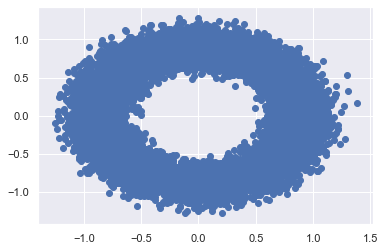

In [22]:
plt.scatter(X[:,0], X[:,1])
plt.show()

* https://scikit-learn.org/stable/_images/sphx_glr_plot_discretization_classification_001.png

In [23]:
scorecard

Pipeline(memory=None,
         steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                  strategy='quantile')),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function stringify at 0x7fbd881c0b90>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, pass_y='deprecated',
                                     validate=False)),
                ('woeencoder',
                 WOEEncoder(col...
                            random_state=None, randomized=False,
                            regularization=1.0, return_df=True, sigma=0.05,
                            verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                                    fit_intercept=Tru

In [24]:
transformer = Pipeline(scorecard.steps[:-1])
X_transformed = transformer.fit_transform(X, y)
X_transformed.head()

,0,1
0,-1.543359,0.335490
1,0.488197,0.521261
2,0.317274,0.280996
3,0.488197,0.280996
4,-1.549668,0.280996


# More Than Two Classes?

## Iris Dataset Example

In [25]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = 'target'
df[target] = data.target
df.head().append(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


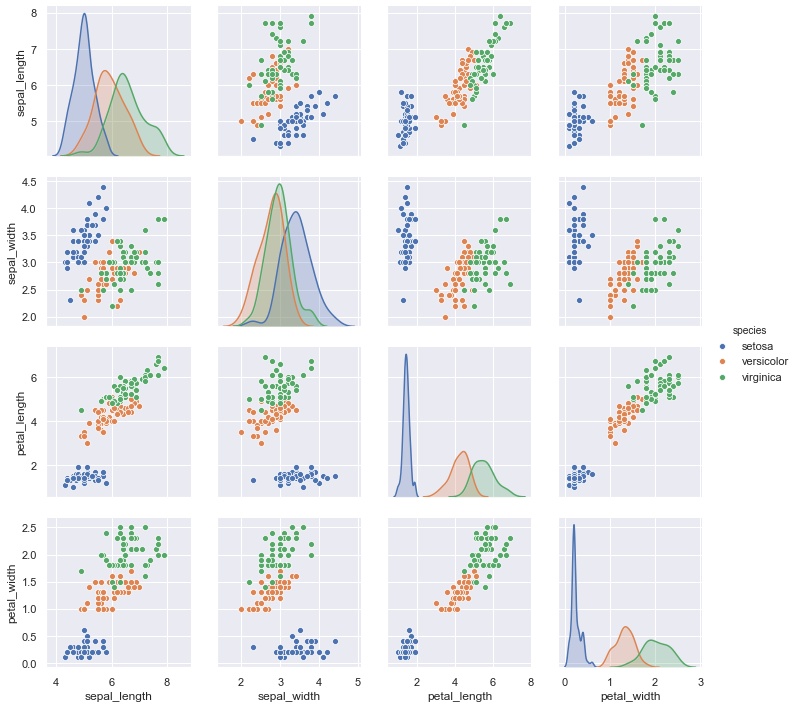

In [26]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.show()

In [27]:
scaler = MinMaxScaler()
lr = LogisticRegression()
pipe = make_pipeline(scaler, lr)

scorecard = make_pipeline(binner, objectify, encoder, lr)

In [28]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X, y = df[used_cols], df[target]



scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std())

0.8400000000000001 +/- 0.07423685817106698


In [29]:
# generates error: 
# ValueError: The target column y must be binary. But the target contains 3 unique value(s).

# FRK: commented out the code to avoid error
#scores = cross_val_score(scorecard, X, y, cv=5, scoring='balanced_accuracy')
#print(scores.mean(), "+/-", scores.std())

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
import mord
from sklearn.datasets import load_boston
from sklearn import linear_model, metrics, preprocessing

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = 'target'
df[target] = data.target
df[target] = df[target].apply(lambda x: int(x))
y = df[target].values

encoder = OrdinalEncoder()
df[target] = encoder.fit_transform(y.reshape(-1, 1))
df[target] = df[target].astype(int)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,19
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,16
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,29
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,31


In [32]:
df.target.nunique()

43

In [33]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X, y = df[used_cols], df[target]

clf1 = linear_model.LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial')
clf1.fit(X, y)

print('Mean Absolute Error of LogisticRegression: %s' %
      metrics.mean_absolute_error(clf1.predict(X), y))

clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(X, y)
print('Mean Absolute Error of LogisticAT %s' %
      metrics.mean_absolute_error(clf2.predict(X), y))

clf3 = mord.LogisticIT(alpha=1.)
clf3.fit(X, y)
print('Mean Absolute Error of LogisticIT %s' %
      metrics.mean_absolute_error(clf3.predict(X), y))

clf4 = mord.LogisticSE(alpha=1.)
clf4.fit(X, y)
print('Mean Absolute Error of LogisticSE %s' %
      metrics.mean_absolute_error(clf4.predict(X), y))


Mean Absolute Error of LogisticRegression: 4.395256916996048
Mean Absolute Error of LogisticAT 3.047430830039526
Mean Absolute Error of LogisticIT 4.675889328063241
Mean Absolute Error of LogisticSE 2.7213438735177866


In [34]:
# FRK: addded LDA to see how it compares to the other methods.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf5=LinearDiscriminantAnalysis()
clf5.fit(X, y)
print('Mean Absolute Error of LinearDicriminantAnalysis %s' %
      metrics.mean_absolute_error(clf5.predict(X), y))

Mean Absolute Error of LinearDicriminantAnalysis 2.7351778656126484


In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Need to handle cases that have only 1 cout (from value_counts())
# 39     1
# 34     1
# 33     1
# 1      1

# Solution to try: merge: 1->2, 33->32, 34->35, 39->40

y_prime = y
y_prime[y_prime == 1]  =  2
y_prime[y_prime == 33] = 32
y_prime[y_prime == 34] = 35
y_prime[y_prime == 39] = 40

#y_prime.value_counts()

In [37]:
clf6=QuadraticDiscriminantAnalysis()
clf6.fit(X, y_prime)
print('Mean Absolute Error of LinearDicriminantAnalysis %s' %
      metrics.mean_absolute_error(clf6.predict(X), y))

Mean Absolute Error of LinearDicriminantAnalysis 1.4565217391304348
